# Lesson 4

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## Plotting with Matplotlib

In [8]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Frequency')
axes1.hist(tips['total_bill'], bins=10)

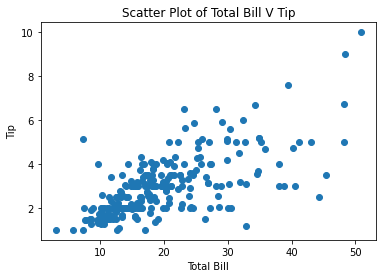

In [9]:
scatter_plot = plt.figure()
scatter_axes = scatter_plot.add_subplot(1,1,1)
scatter_axes.set_title('Scatter Plot of Total Bill V Tip')
scatter_axes.set_xlabel('Total Bill')
scatter_axes.set_ylabel('Tip')
scatter_axes.scatter(tips['total_bill'], tips['tip'])

In [10]:
def reccode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
tips['sex_color'] = tips['sex'].apply(reccode_sex)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,sex_color
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


{'whiskers': [<matplotlib.lines.Line2D at 0x7faff1088b20>,
 'caps': [<matplotlib.lines.Line2D at 0x7faff10941c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7faff10886d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7faff10948e0>,
 'fliers': [],
 'means': []}

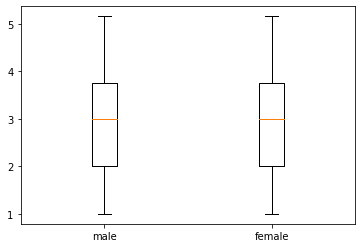

In [11]:
boxplot = plt.figure()
boxplot_axes = boxplot.add_subplot(1,1,1)
male_tips = tips[tips['sex'] == 'Male']['tip']
female_tips = tips[tips['sex'] == 'Male']['tip']
boxplot_axes.boxplot([male_tips, female_tips], labels=['male', 'female'], whis=1, showfliers=0)

#### Scatter Plot

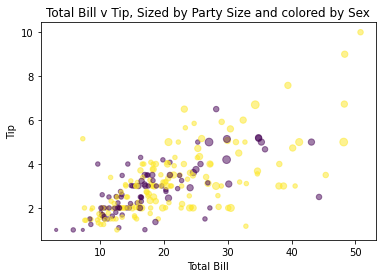

In [12]:
scatter_plot2 = plt.figure()

axes_scatter_plot2 = scatter_plot2.add_subplot(1,1,1)
axes_scatter_plot2.set_title('Total Bill v Tip, Sized by Party Size and colored by Sex')
axes_scatter_plot2.set_xlabel('Total Bill')
axes_scatter_plot2.set_ylabel('Tip')
axes_scatter_plot2.scatter(x=tips['total_bill'], y=tips['tip'], s=tips['size']*10, c=tips['sex_color'], alpha=0.5)

## Plotting with seaborn

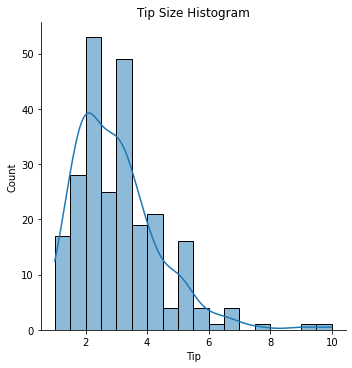

In [13]:
hist = sns.displot(tips['tip'], kde=True).set(title='Tip Size Histogram')
hist.set_xlabels('Tip')
hist.set_ylabels('Count')


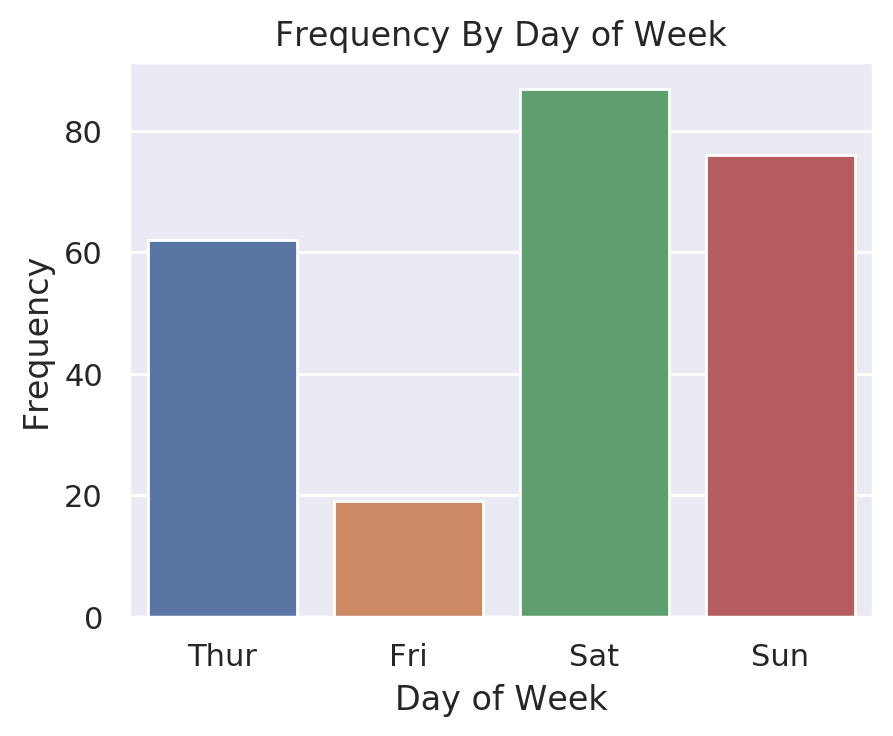

In [49]:
countplot = sns.countplot(x='day', data=tips).set(
    title='Frequency By Day of Week', 
    xlabel='Day of Week', 
    ylabel='Frequency')

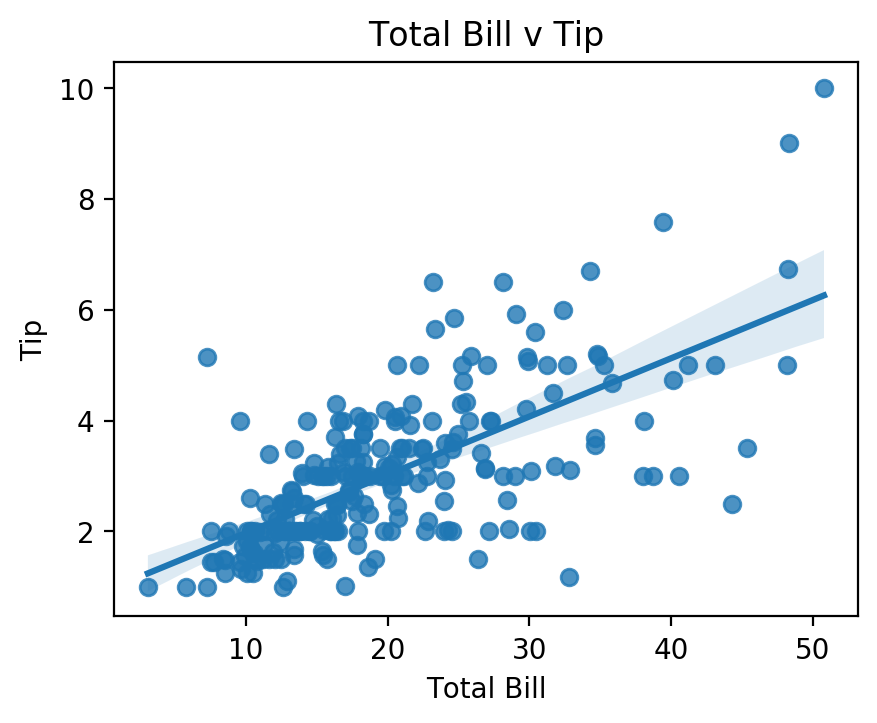

In [38]:
scatter = sns.regplot(x='total_bill', y='tip', data=tips).set(
    title='Total Bill v Tip',
    xlabel='Total Bill',
    ylabel='Tip')

Text(0.5, 0.98, 'Bill V Tip')

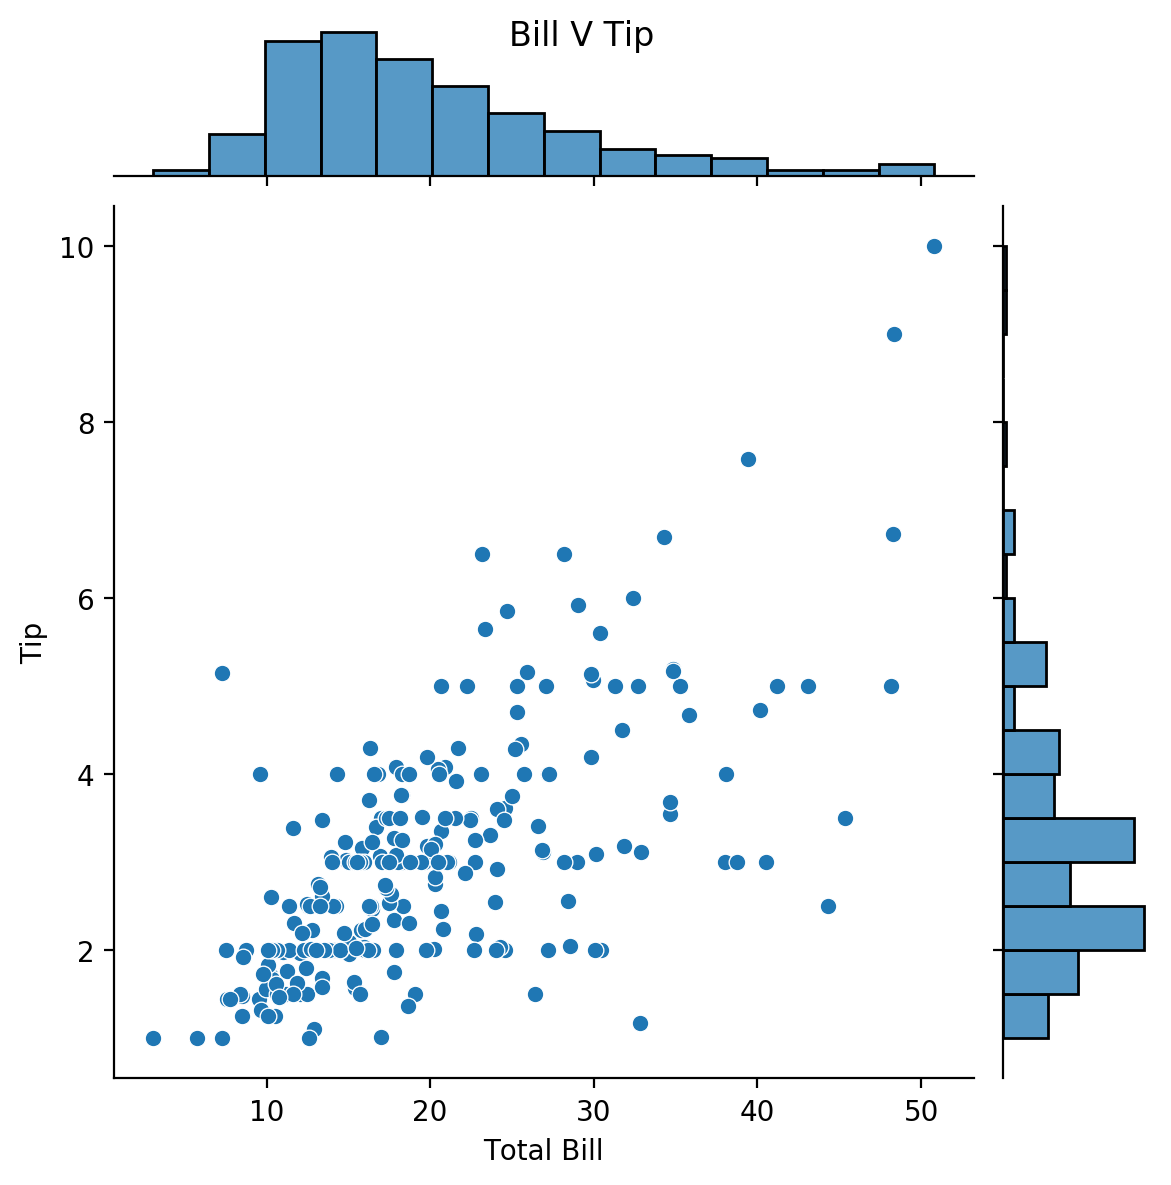

In [9]:

jointplot = sns.jointplot(x='total_bill', y='tip', data=tips)
jointplot.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
jointplot.fig.suptitle('Bill V Tip')

#### Hex Plot

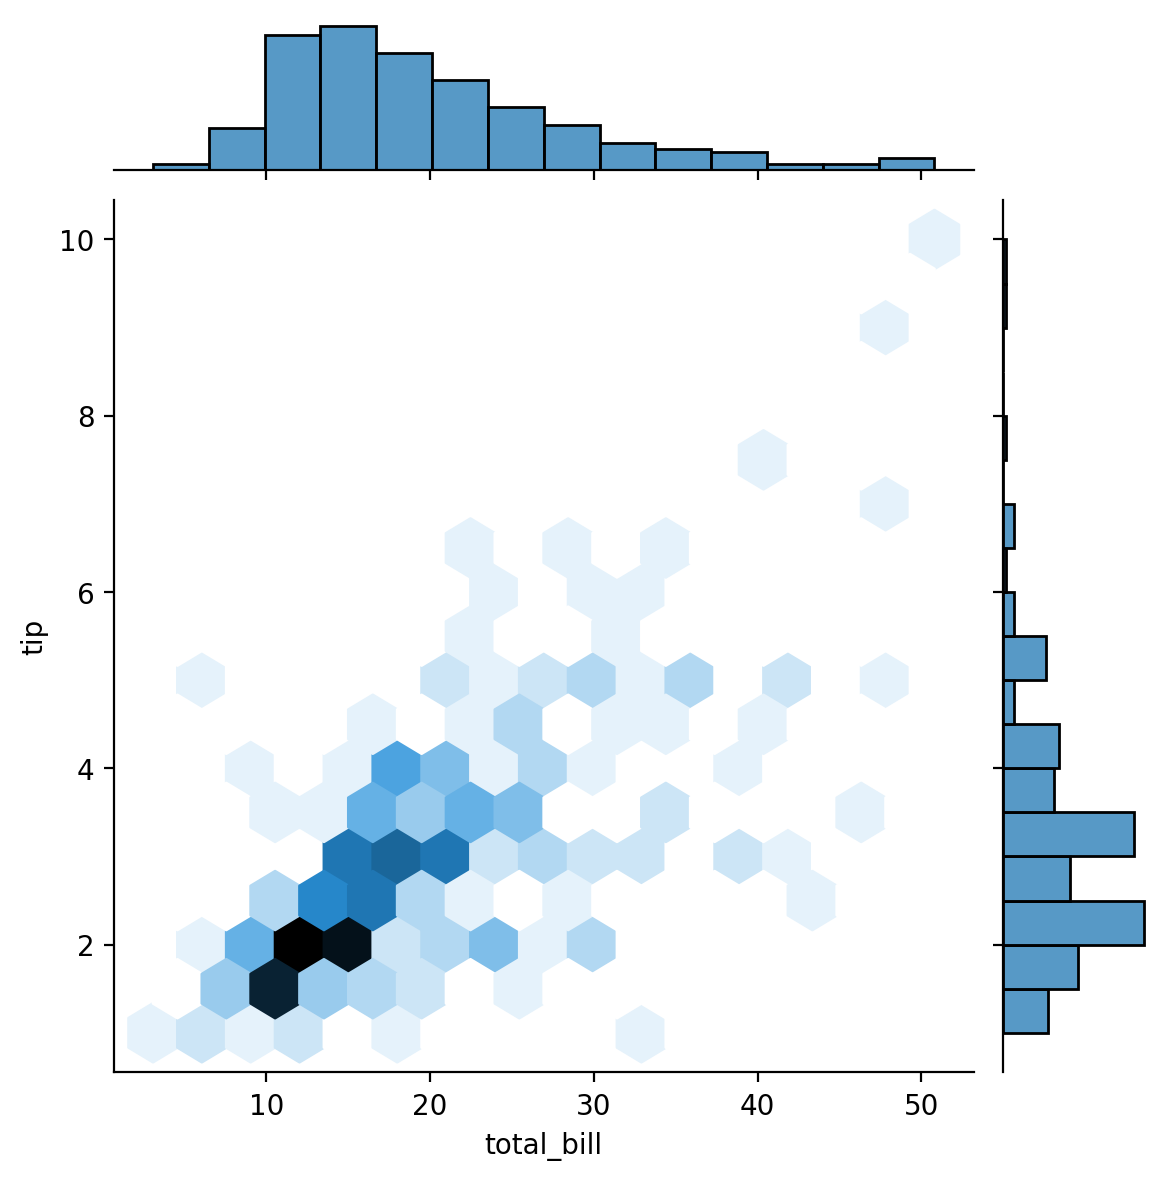

In [10]:
jointplot = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

#### KDE Plot

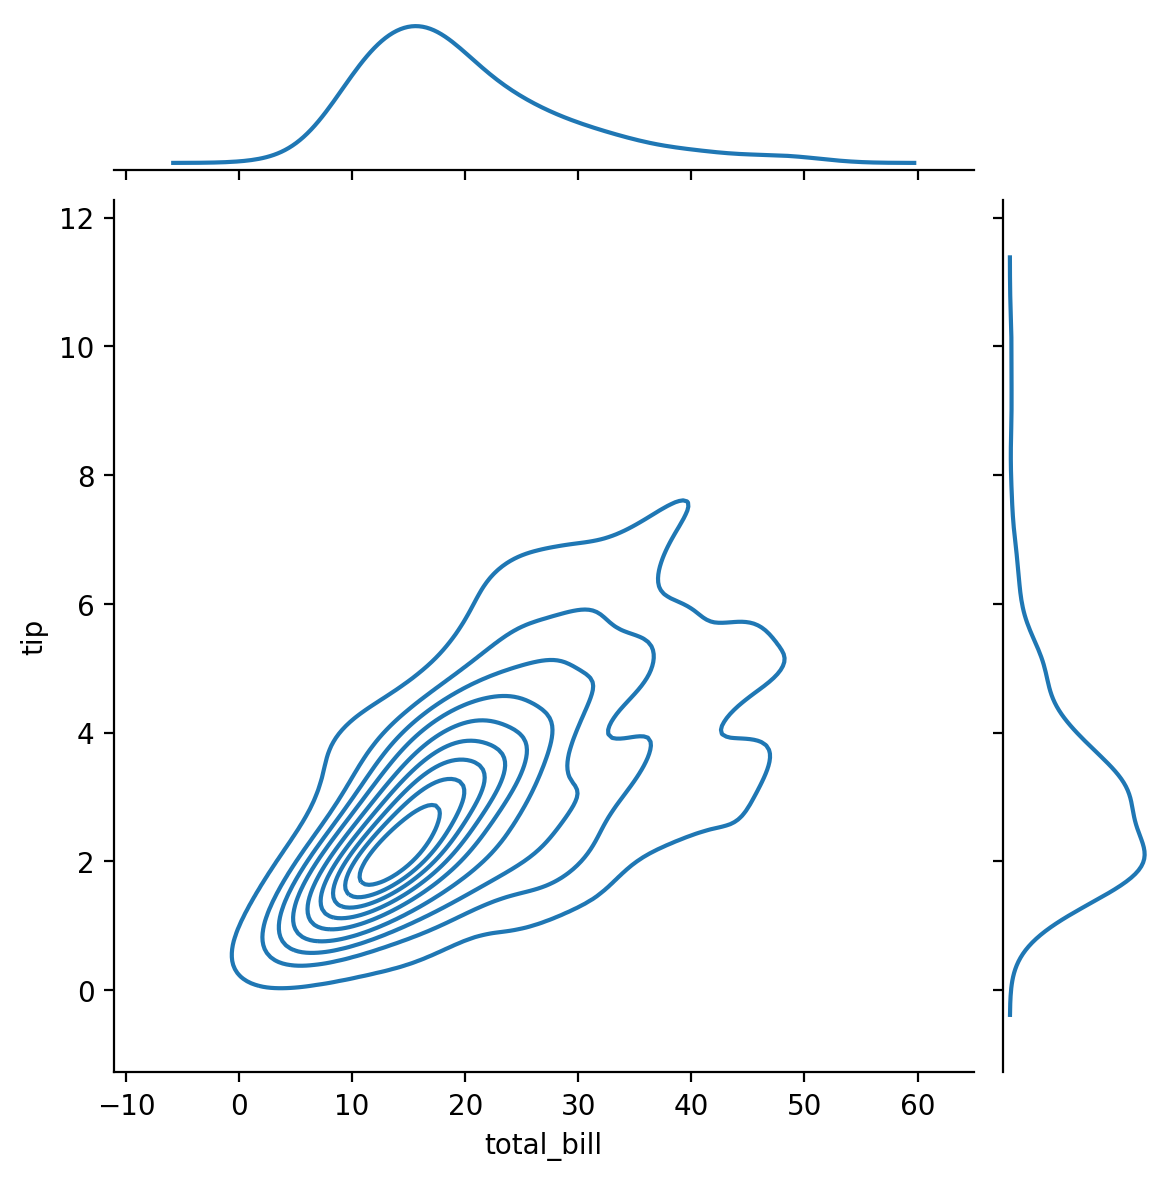

In [22]:
kde_joint = sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde')

#### Bar Plot

[Text(0, 0.5, 'Total Bill'),
 Text(0.5, 0, 'Time of Day'),
 Text(0.5, 1.0, 'Hello')]

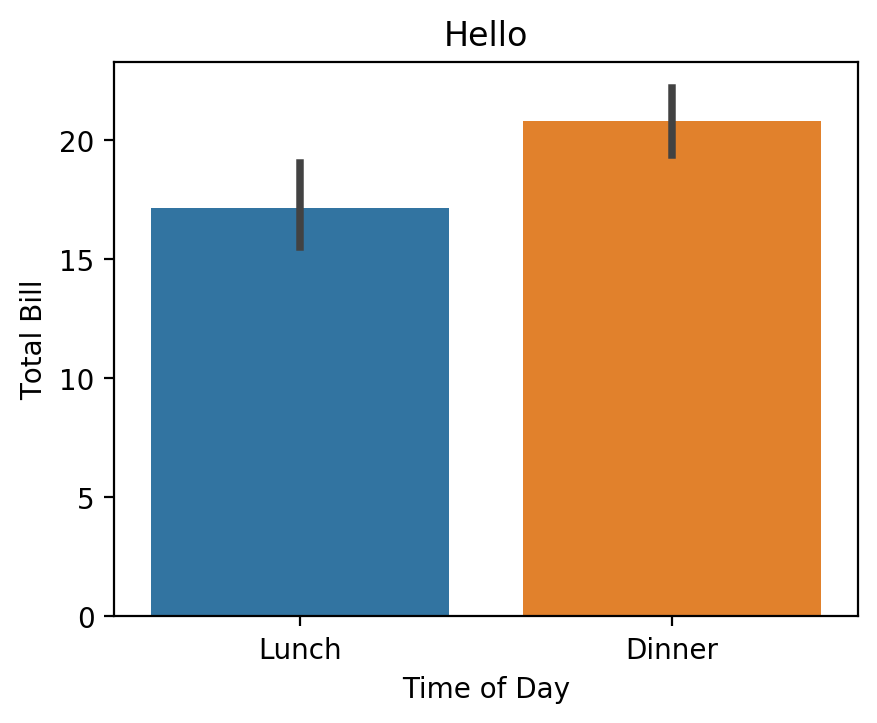

In [21]:
sns.barplot(x='time', y='total_bill', data=tips).set(
    title='Hello',
    xlabel='Time of Day',
    ylabel='Total Bill'
)

#### Box Plot

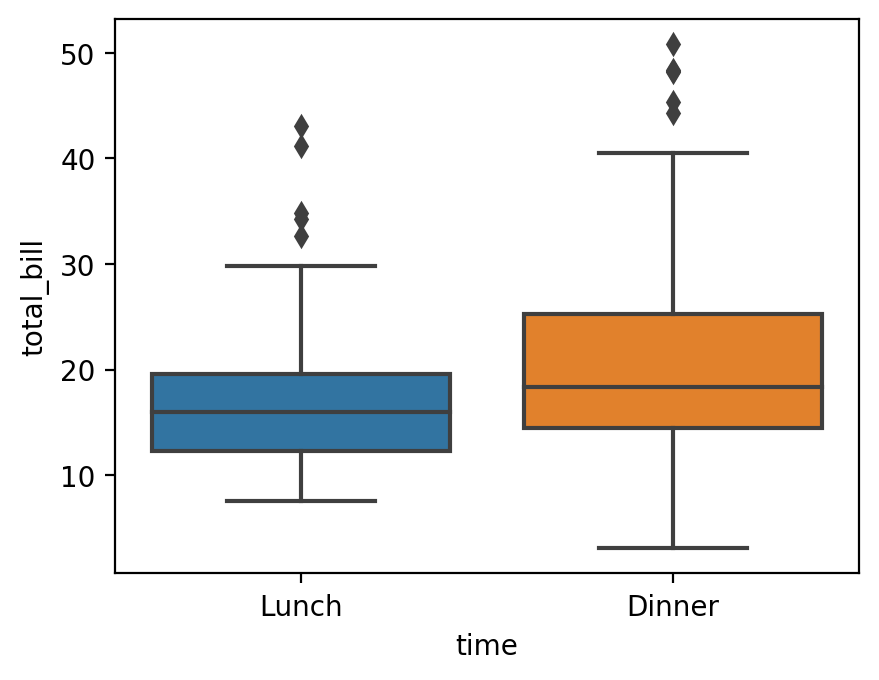

In [32]:
box = sns.boxplot(x='time', y='total_bill', data=tips)

#### Violin Plot

Text(0.5, 1.0, 'Violin Plot of Total Bill V Time')

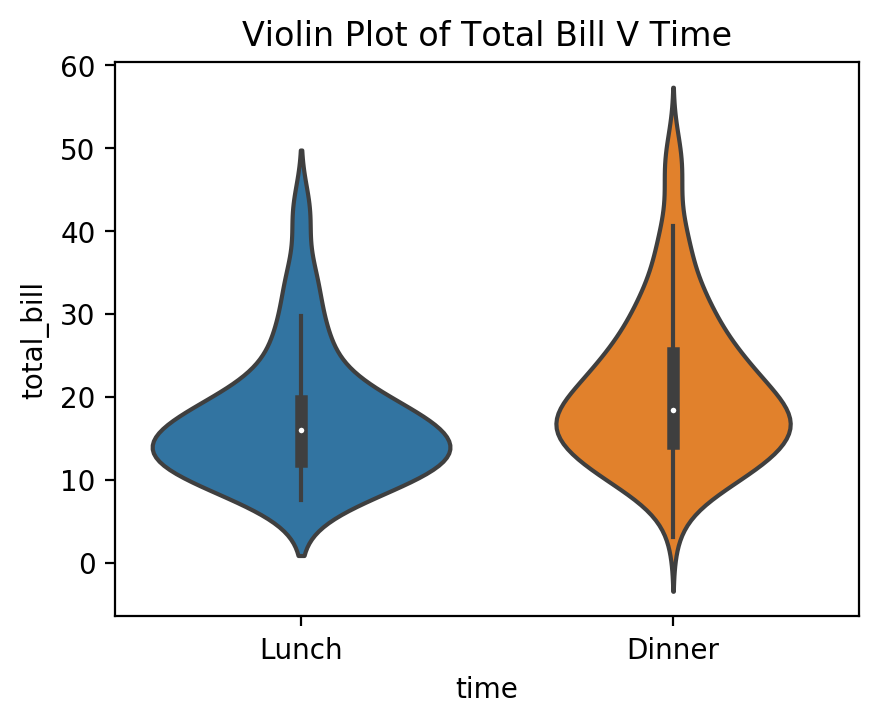

In [34]:
violin = sns.violinplot(x='time', y='total_bill', data=tips)
violin.set_title('Violin Plot of Total Bill V Time')

#### Pair Grid

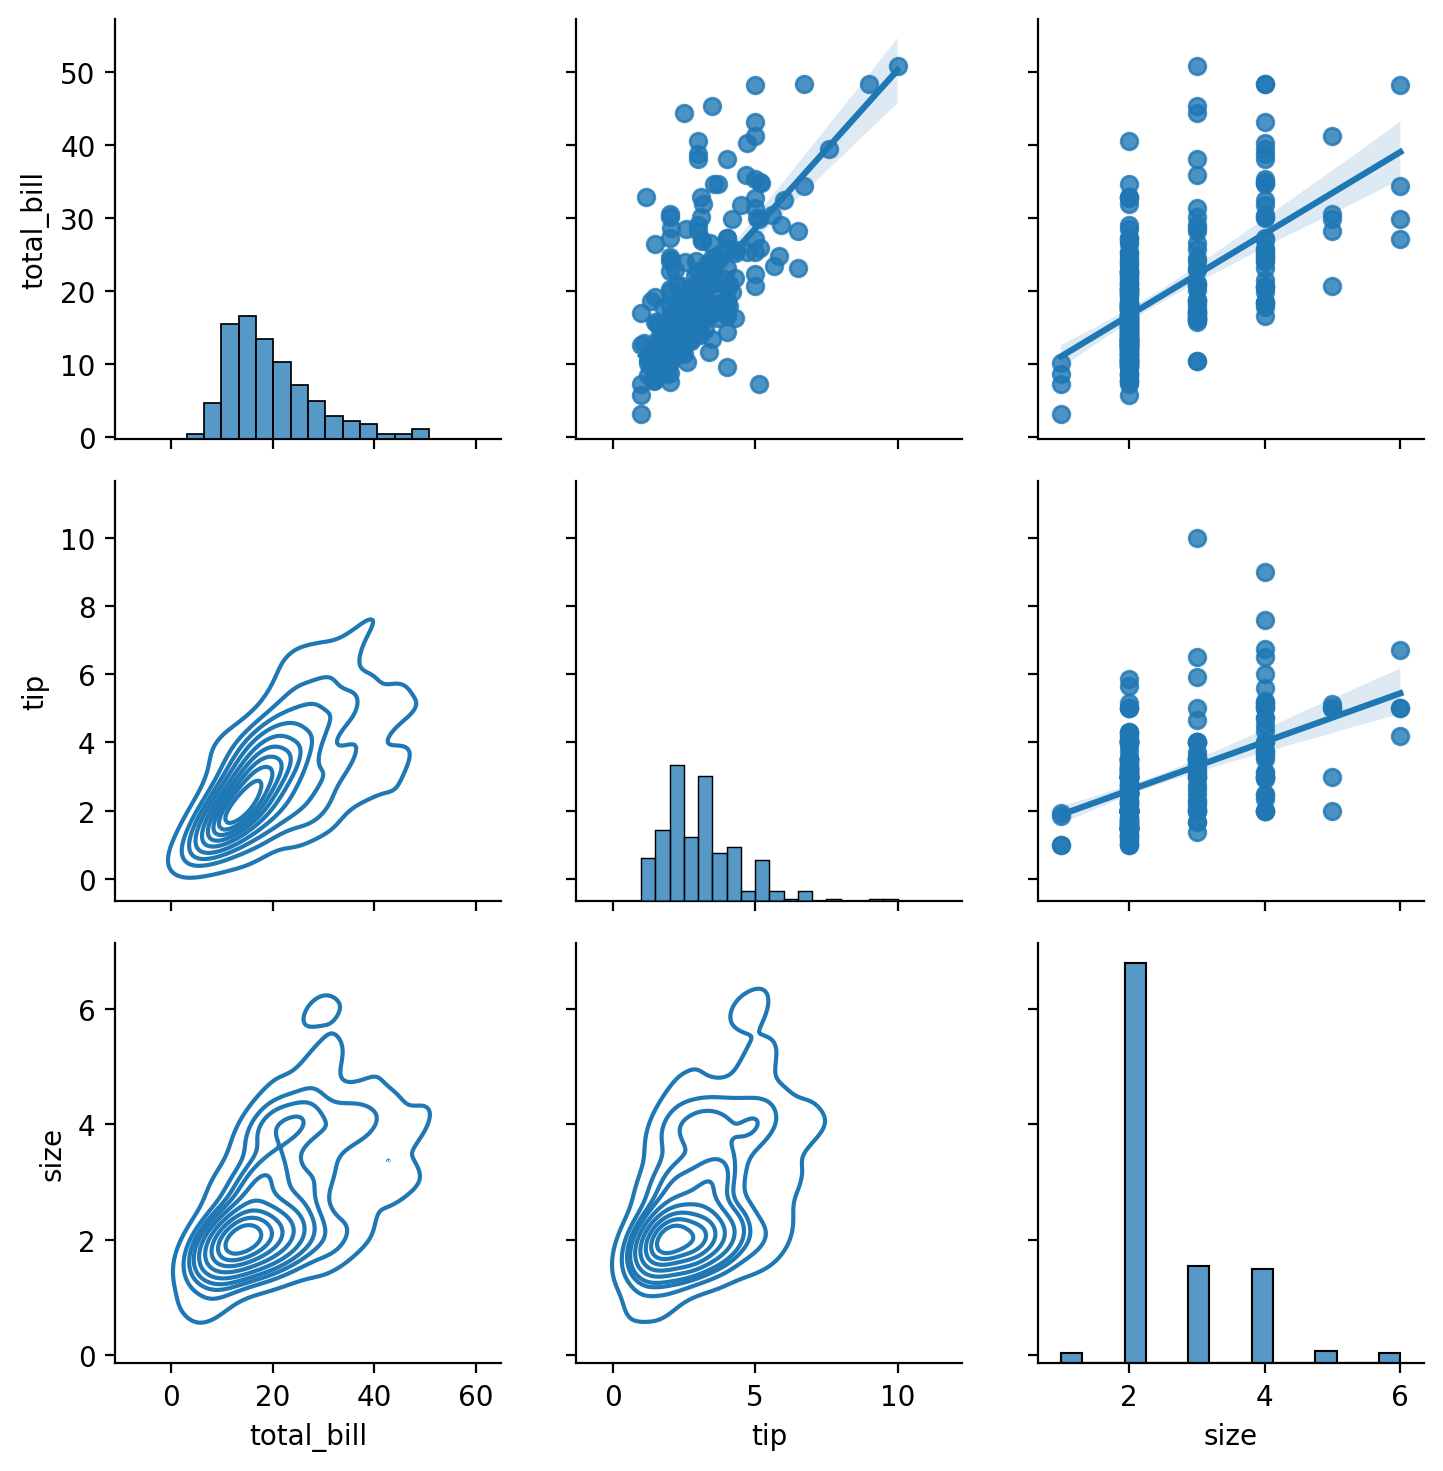

In [26]:
tips_copy = tips[['total_bill', 'tip', 'size']]
pair_grid = sns.PairGrid(tips)
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.histplot)

#### Voilin Split Plot - Time v Bill (Split by Gender)

[Text(0.5, 1.0, 'Time v Bill (Split by Gender)')]

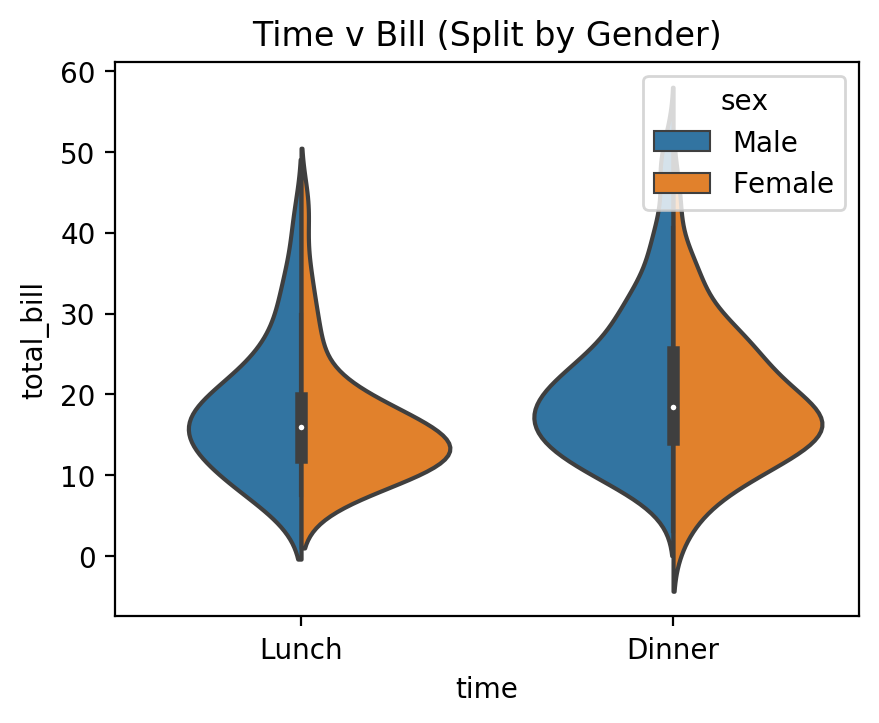

In [36]:
sns.violinplot(x='time', y='total_bill', hue='sex', data=tips, split=True).set(
    title='Time v Bill (Split by Gender)'
)


#### LM Plot

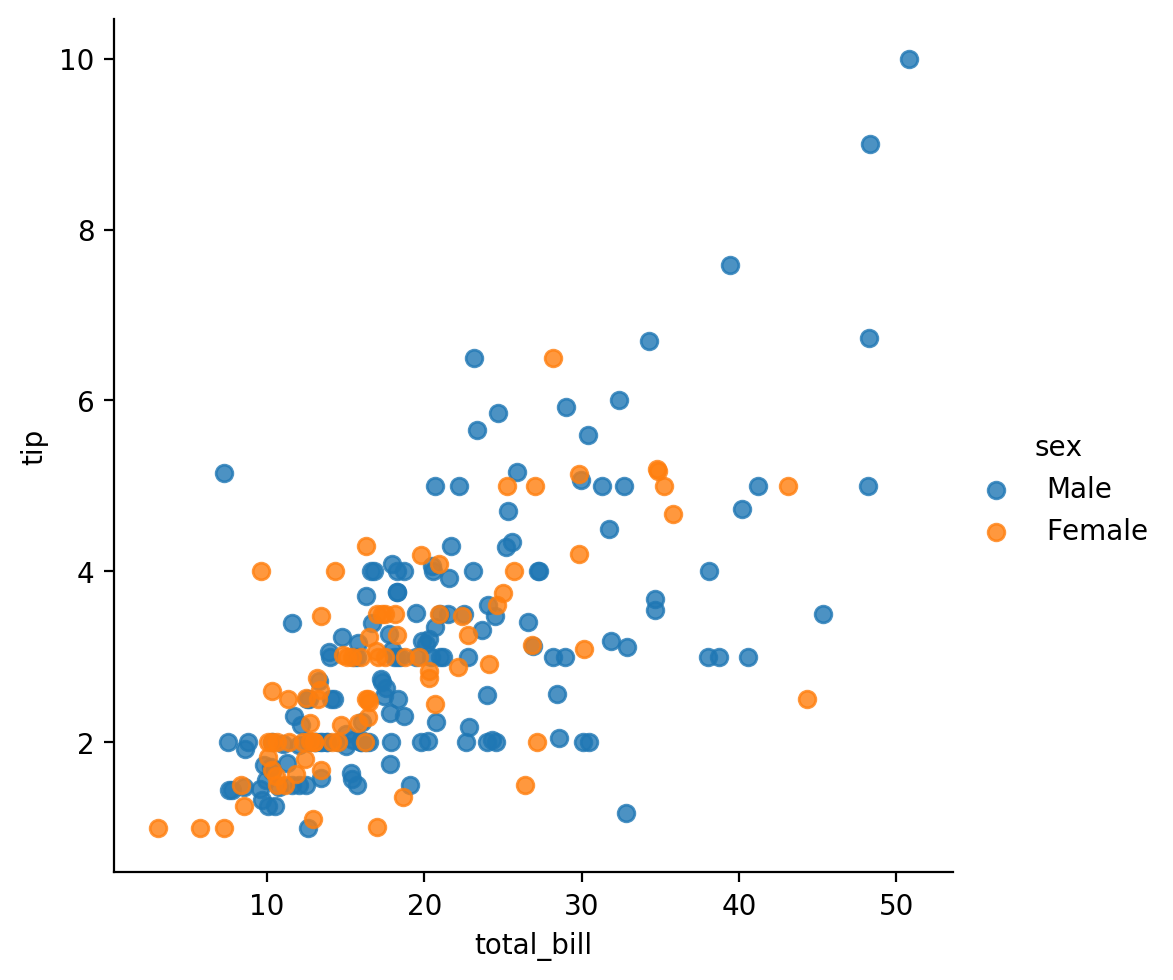

In [43]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

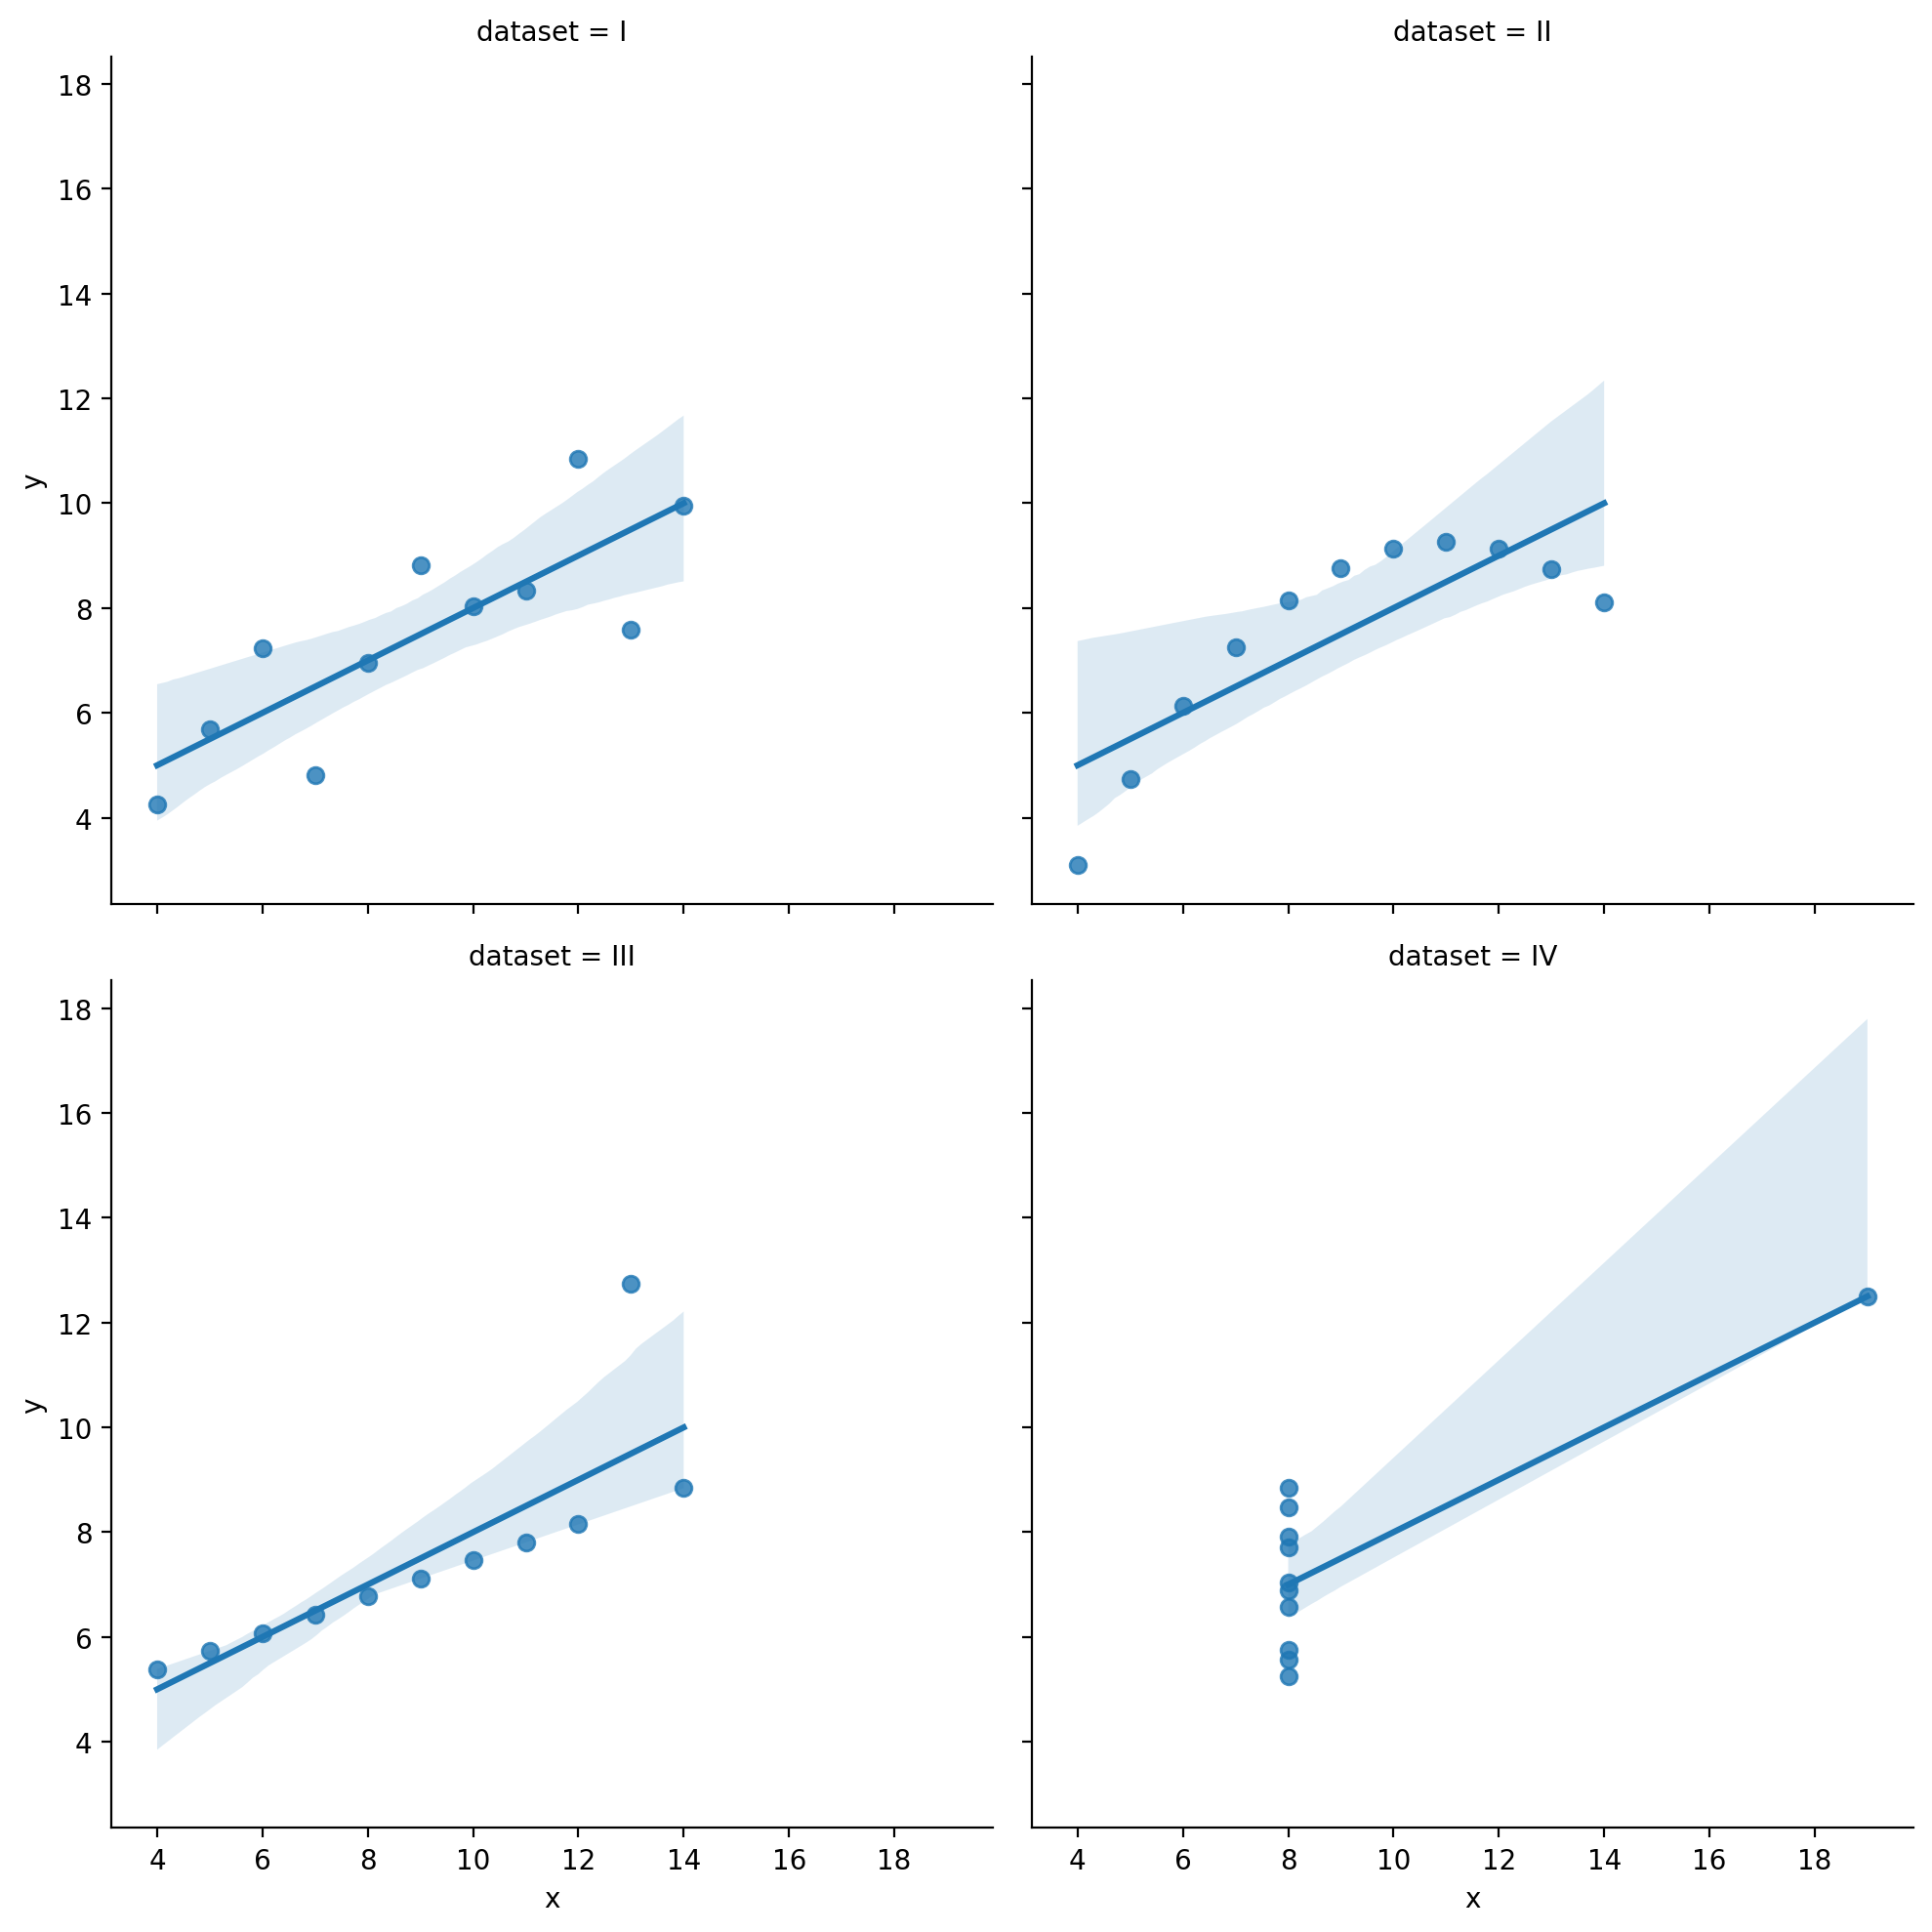

In [53]:
ans = sns.load_dataset('anscombe')
ans_plot = sns.lmplot(x='x', y='y', data=ans, col='dataset', col_wrap=2)

#### Facet Plot - Split By Day

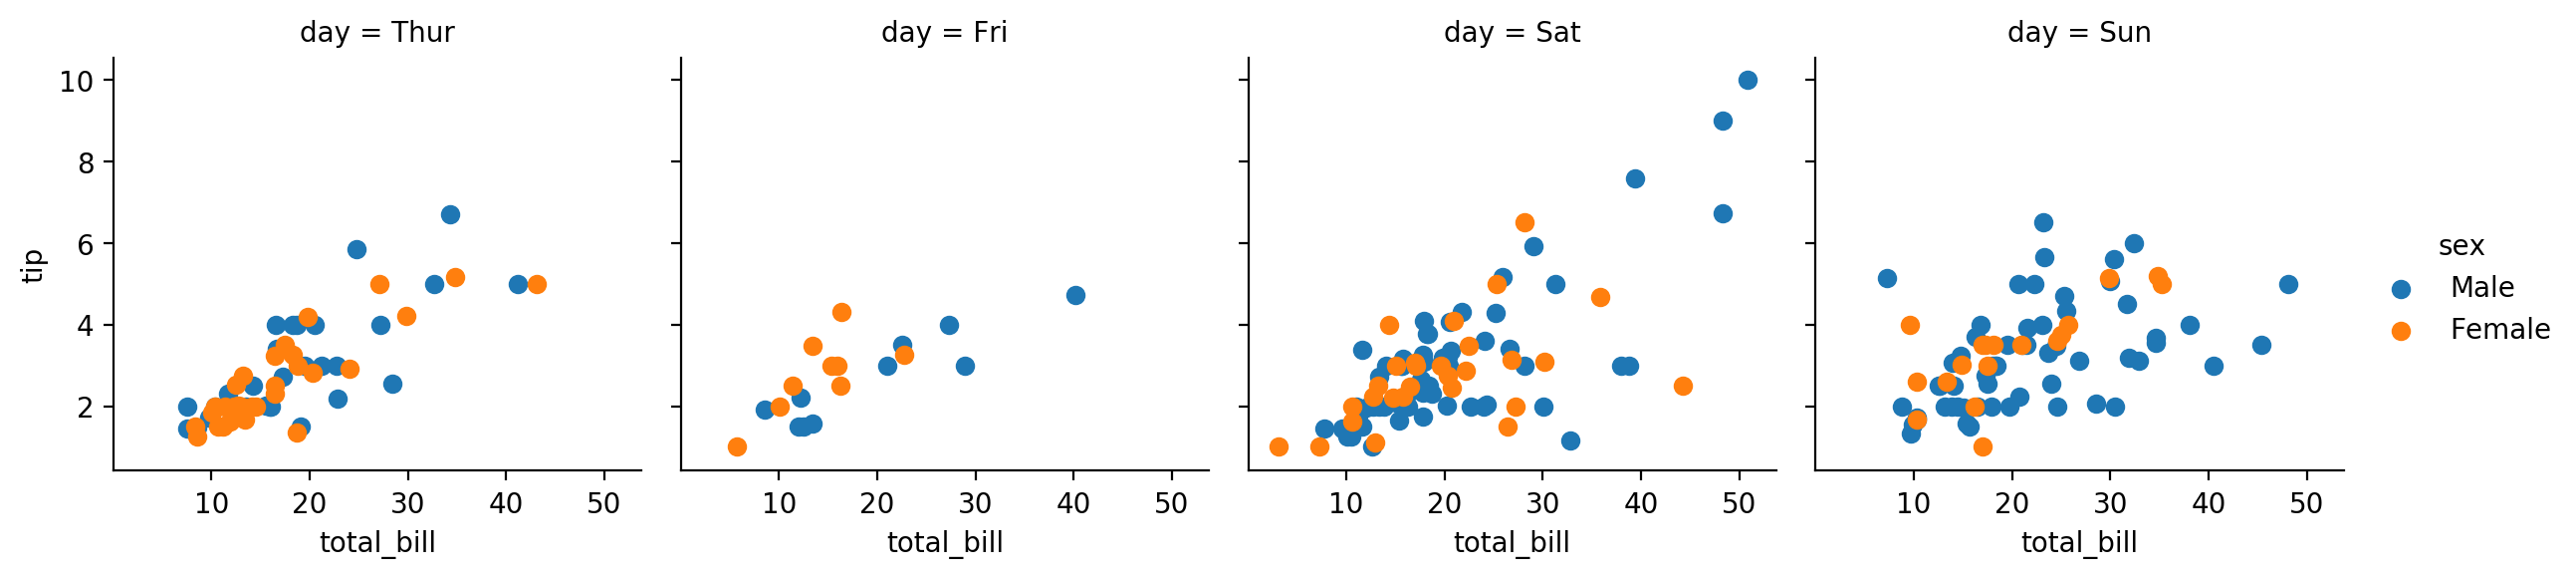

In [56]:
facet = sns.FacetGrid(tips, col='day', hue='sex')
facet = facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()